# Homework 05

## Due Tuesday, March 29th

### 1. Flyover states

_[This is very similar to the exercise done in class. This is a continuation.]_

What states do you see when you fly from LA (airport code LAX) to NYC (airport code EWR)?

> LAX: 33.9425° N, 118.4081° W

> EWR: 40.6925° N, 74.1686° W

Load in the `states_21basic` shapefile using these commands:

    from mpl_toolkits.basemap import Basemap
    m = Basemap(llcrnrlon=-150.,llcrnrlat=20.,
            urcrnrlon=-50.,urcrnrlat=50.,
            rsphere=(6378137.00,6356752.3142),
            resolution='l',projection='merc',
            lat_0=40.,lon_0=-100.,lat_ts=20.)
    m.readshapefile('../materials/states_21basic/states', 'states')

The boundary information for all of the states is now held in an attribute of the map object `m.states`, which is a list of lists of x-y pairs denoting the boundaries. Next use the `m.gcpoints` function to get the points along the great circle path. Convert all of these things into Shapely objects, and check for intersections. Add a buffer of 100km to the flight path to see what states you might potentially see along the way. Use this analysis to provide the following:

1. Create and display a map that shows the flight path, with the states that are seen along the flight path clearly highlighted in some way.

2. Use the information in m.states_info to extract and print a list containing the names of the states seen, with unique names. (see `np.unique`)


['Alaska' 'California' 'Colorado' 'Delaware' 'District of Columbia'
 'Florida' 'Georgia' 'Louisiana' 'Maryland' 'North Carolina' 'Texas'
 'Virginia']


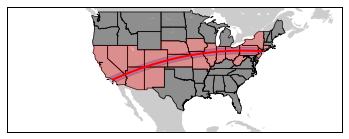

In [229]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.basemap import Basemap
import shapely.geometry
import shapely.ops

m = Basemap(llcrnrlon=-150.,llcrnrlat=20.,
        urcrnrlon=-50.,urcrnrlat=50.,
        rsphere=(6378137.00,6356752.3142),
        resolution='l',projection='merc',
        lat_0=40.,lon_0=-100.,lat_ts=20.)
m.readshapefile('/anaconda/python4geosciences/materials/states_21basic/states', 'states')

m.fillcontinents();
x,y = m.gcpoints(-118.4081,33.9425,-74.1686,40.6925,1000)
plt.plot(x,y,'-r',lw=2)

line = shapely.geometry.LineString(zip(*m.gcpoints(-118.4081,33.9425,-74.1686,40.6925,1000)))
dialated = line.buffer(100000)
plt.fill(*dialated.boundary.xy, alpha=0.2)
states = shapely.ops.linemerge(m.states)

stateslist = []
for i in range(0,134,1):
    poly = states[i]
    if poly.intersects(dialated):
        color = 'r'
        stateslist.append(m.states_info[i]['STATE_NAME'])
    else:
        color = 'k'
    coords = shapely.ops.cascaded_union(poly).coords[:]
    x, y = zip(*coords)
    plt.fill(x, y, color=color, alpha=0.3)

print(np.unique(stateslist))

['Alaska' 'Arizona' 'California' 'Colorado' 'Connecticut' 'Delaware'
 'District of Columbia' 'Florida' 'Georgia' 'Illinois' 'Indiana' 'Iowa'
 'Kansas' 'Louisiana' 'Maryland' 'Missouri' 'Nebraska' 'Nevada'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'Ohio'
 'Pennsylvania' 'Texas' 'Utah' 'Virginia' 'West Virginia']


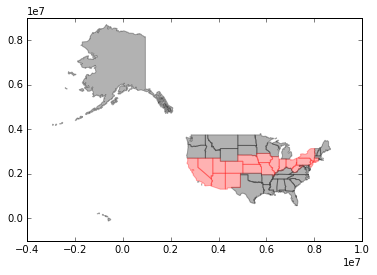

In [241]:
statespolylist = []
statespolyboundary = []

for i in range(0,len(m.states),1):
    statespolylist.append(shapely.geometry.Polygon(m.states[i]))
    statespolyboundary.append(shapely.geometry.Polygon(m.states[i]).boundary)

shapely.ops.linemerge(statespolyboundary)

for i in range(0,134,1):
    poly = statespolyboundary[i]
    if poly.intersects(dialated):
        color = 'r'
        stateslist.append(m.states_info[i]['STATE_NAME'])
    else:
        color = 'k'
    coords = shapely.ops.cascaded_union(poly).coords[:]
    x, y = zip(*coords)
    plt.fill(x, y, color=color, alpha=0.3)
    
print(np.unique(stateslist))

In [247]:
m.states[1]

[(-976898.7953766327, 217094.44519776478),
 (-987820.9164320618, 208092.5741885826),
 (-1002102.732196598, 209893.72664365545),
 (-1008823.7959682004, 217096.9130278444),
 (-1018906.0195081236, 218897.97114378074),
 (-1025626.6646913791, 227005.11500919145),
 (-1016385.4897849143, 239625.7162037962),
 (-1002101.7903728206, 246830.31008221582),
 (-982779.229103124, 248621.97495765332),
 (-977738.1696567085, 245013.9040553798),
 (-972697.3195044621, 236902.16204001894),
 (-976057.014213572, 227900.06790251518),
 (-976898.7953766327, 217094.44519776478)]

### 2. Area in a Voronoi diagram

Given the series of points:

     np.array([[ 0.77354201,  0.34072038],
               [ 0.43807549,  0.93001924],
               [ 0.5624092 ,  0.79438991],
               [ 0.02536295,  0.46180244],
               [ 0.59533179,  0.07522803],
               [ 0.47867418,  0.70302822],
               [ 0.30371564,  0.83135442],
               [ 0.5856915 ,  0.16340903],
               [ 0.14700491,  0.60268997],
               [ 0.97098631,  0.51692456]])
               
create a Voronoi diagram, and calculate the area contained in the finite regions. What fraction of the total area is at least 0.001 unit away from any boundary? 0.01 away? And 0.1 away?


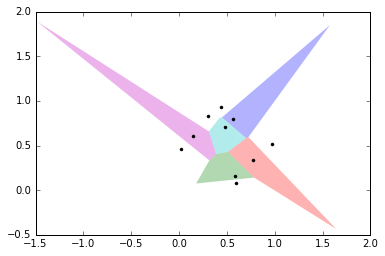

In [115]:
from scipy import spatial

points = np.array([[ 0.77354201,  0.34072038],
           [ 0.43807549,  0.93001924],
           [ 0.5624092 ,  0.79438991],
           [ 0.02536295,  0.46180244],
           [ 0.59533179,  0.07522803],
           [ 0.47867418,  0.70302822],
           [ 0.30371564,  0.83135442],
           [ 0.5856915 ,  0.16340903],
           [ 0.14700491,  0.60268997],
           [ 0.97098631,  0.51692456]])

voronoi = spatial.Voronoi(points)

for indices in voronoi.regions:
    if not indices: continue     # check for empty regions
    if -1 in indices: continue   # region includes a vertex out of the diagram (the region goes to infinity)
    plt.fill(voronoi.vertices[indices, 0], voronoi.vertices[indices, 1], edgecolor='none', alpha=0.3)

plt.plot(points[:, 0], points[:, 1], '.k')

lines = [
    shapely.geometry.LineString(voronoi.vertices[line])
    for line in voronoi.ridge_vertices
    if -1 not in line
]

In [116]:
polyarea = []
polyarea1 = []
polyarea2 = []
polyarea3 = []
for poly in shapely.ops.polygonize(lines):
    polyarea.append(poly.area)
    polyarea1.append(poly.buffer(-.001).area)
    polyarea2.append(poly.buffer(-.01).area)
    polyarea3.append(poly.buffer(-.1).area)
    
print(sum(polyarea)) # area inside finite regions
print(sum(polyarea1)/sum(polyarea)) # area 0.001 away from any edges
print(sum(polyarea2)/sum(polyarea)) # fraction area 0.01 away from any edges
print(sum(polyarea3)/sum(polyarea)) # fraction area 0.1 away from any edges

1.0138912213334281
0.986090261784083
0.8652536153511616
0.09244245663939883


### 3. 2D interpolation

Data (found in `python4geosciences/data/MS03_L15.txt`) gathered from a field cruise out of the TAMU Oceanography department is randomly located in space (that is, unstructured) because of the nature of the measurement: the instrument is lowered into the water from a ship, and is brought up and down through the water column as the ship moves to get a sampling of the fields.

Read in the data file and plot the temperature in a `scatter` plot as a function of depth and latitude. Next, interpolate the temperature data to be on a uniform grid (to make it structured). Now, plot it using `contourf`, which requires structured data. Experiment with different spacing in your uniform grid, and with different numbers of contours to see how the results change, and choose values that provide a nice-looking image which closely resembles the original data.

In [253]:
latdepthtemp = np.genfromtxt('/anaconda/python4geosciences/data/MS03_L15.txt',
                                 skip_header=114,usecols=[0, 2,3], dtype=None)

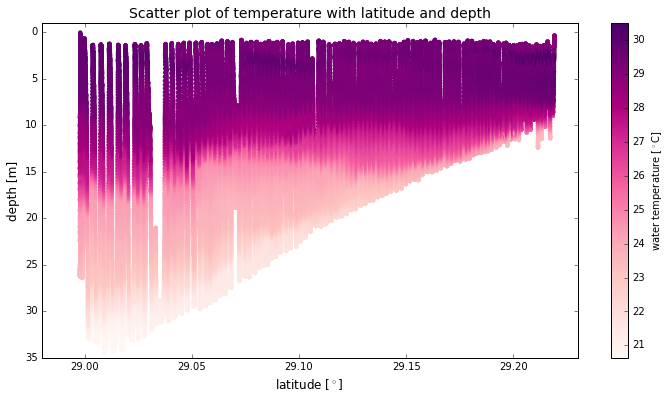

In [298]:
fig = plt.figure(figsize=(12,6))
plt.scatter(latdepthtemp[:,0],latdepthtemp[:,1],c=latdepthtemp[:,2],lw = 0,cmap='RdPu')
plt.xlabel('latitude [$^\circ$]',fontsize=12)
plt.title('Scatter plot of temperature with latitude and depth',fontsize=14)
plt.ylabel('depth [m]',fontsize=12)
plt.ylim(-1,35)
plt.xlim(28.98,29.23)
plt.gca().invert_yaxis()
plt.colorbar().set_label(r'water temperature [$^\circ$C]')

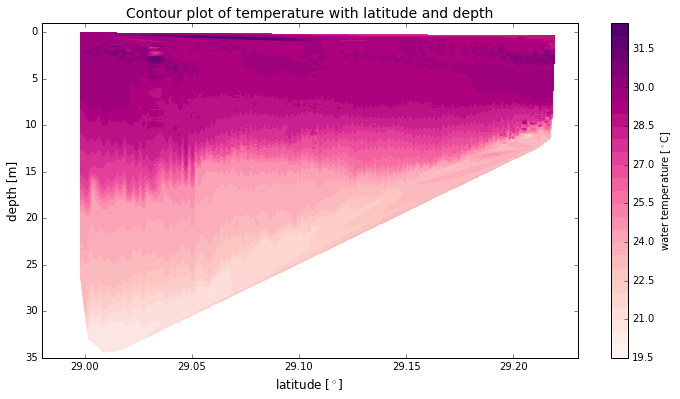

In [300]:
grid_x, grid_y = np.mgrid[28.98:29.23:1000j, -1:35:1000j]

from scipy.interpolate import griddata

plt.gcf().set_size_inches(12, 6)
grid = griddata((latdepthtemp[:,0],latdepthtemp[:,1]), latdepthtemp[:,2], (grid_x, grid_y),
                method='cubic',rescale=True)
plt.contourf(grid_x, grid_y,grid,25,cmap='RdPu')
plt.ylim(-1,35)
plt.xlim(28.98,29.23)
plt.gca().invert_yaxis()
plt.xlabel('latitude [$^\circ$]',fontsize=12)
plt.title('Contour plot of temperature with latitude and depth',fontsize=14)
plt.ylabel('depth [m]',fontsize=12)
plt.colorbar().set_label(r'water temperature [$^\circ$C]')

### 4. (Grad) Area of Greenland and Australia in different projections

Set up Basemap instances of the following projections: Mercator, Robinson, and Mollweide; make sure that all three projections are set up to show both Greenland and Australia at the same time (this is necessary for Mercator in particular). Plot them side-by-side to see how they compare.

Next, read in the shape files for Greenland and Australia, found in the `data` directory; you can do this with something like the following (but you might need to change the directory path):

> m.readshapefile('../python4geosciences/data/GRL_adm_shp/GRL_adm0', 'greenland', drawbounds=False)
> m.readshapefile('../python4geosciences/data/AUS_adm_shp/AUS_adm0', 'australia', drawbounds=False)

where `m` is a `Basemap` instance. This gives you a series of polygons that make up each country, saved in `m.greenland` and `m.australia`. Find the area of the two countries in each projection and compare them. What is the area of Australia relative to the area of Greenland for each projection, and how does this compare to what it is in reality?

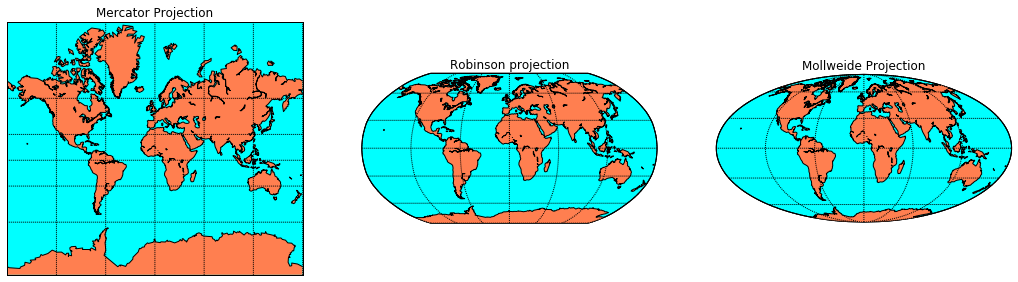

In [120]:
fig = plt.figure(figsize=(18, 8))
ax = fig.add_subplot(131)
ax.set_title("Mercator Projection")
m1 = Basemap(projection='merc',llcrnrlat=-80,urcrnrlat=84,\
            llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
m1.drawcoastlines()
m1.fillcontinents(color='coral',lake_color='aqua')
m1.drawparallels(np.arange(-90.,91.,30.))
m1.drawmeridians(np.arange(-180.,181.,60.))
m1.drawmapboundary(fill_color='aqua')

ax2 = fig.add_subplot(132)
ax2.set_title("Robinson projection")
m2 = Basemap(projection='robin',lon_0=0,resolution='c')
m2.drawcoastlines()
m2.fillcontinents(color='coral',lake_color='aqua')
m2.drawparallels(np.arange(-90.,120.,30.))
m2.drawmeridians(np.arange(0.,360.,60.))
m2.drawmapboundary(fill_color='aqua')

ax3 = fig.add_subplot(133)
ax3.set_title("Mollweide Projection")
m3 = Basemap(projection='moll',lon_0=0,resolution='c')
m3.drawcoastlines()
m3.fillcontinents(color='coral',lake_color='aqua')
m3.drawparallels(np.arange(-90.,120.,30.))
m3.drawmeridians(np.arange(0.,420.,60.))
m3.drawmapboundary(fill_color='aqua')



In [121]:
#Size of Greenland and Australia in Mercator
greenlandmerc = m1.readshapefile('/anaconda/python4geosciences/data/GRL_adm_shp/GRL_adm0', 'greenland', drawbounds=False)
ausmerc = m1.readshapefile('/anaconda/python4geosciences/data/AUS_adm_shp/AUS_adm0', 'australia', drawbounds=False)

In [160]:
greenlandarea = []
for poly in m1.greenland:
    polygon = shapely.geometry.Polygon(poly).area
    greenlandarea.append(polygon)
    
print(sum(greenlandarea)/1000000) # area of greenland in Mercator projection in square kilometers
    
australiaarea = []

for poly in m1.australia:
    poly = shapely.geometry.Polygon(poly).area
    australiaarea.append(poly)

print(sum(australiaarea)/1000000) # area of Australia in Mercator projection in square kilometers

# Greenland is much, much bigger than in real life (30.8 million vs 2.166 million km^2)
# Australia is 10% bigger than in real life (8.5 million vs 7.692 million km^2)

30789355.37184399
8501235.31068883


In [158]:
#Size of Greenland and Australia in Robinson
greenlandmerc = m2.readshapefile('/anaconda/python4geosciences/data/GRL_adm_shp/GRL_adm0', 'greenland', drawbounds=False)
ausmerc = m2.readshapefile('/anaconda/python4geosciences/data/AUS_adm_shp/AUS_adm0', 'australia', drawbounds=False)

In [159]:
greenlandarea = []
for poly in m2.greenland:
    polygon = shapely.geometry.Polygon(poly).area
    greenlandarea.append(polygon)
    
print(sum(greenlandarea)/1000000) 
# area of greenland in Robin projection in square kilometers
    
australiaarea = []

for poly in m2.australia:
    poly = shapely.geometry.Polygon(poly).area
    australiaarea.append(poly)

print(sum(australiaarea)/1000000) 
# area of Australia in Robin projection in square kilometers

# Greenland is 60% bigger than in real life (3.423 million vs 2.166 million km^2)
# Australia is 12% smaller than in real life (6.792 million vs 7.692 million km^2)

3423077.3321398636
6791690.51863253


In [161]:
#Size of Greenland and Australia in Mollweide
greenlandmerc = m3.readshapefile('/anaconda/python4geosciences/data/GRL_adm_shp/GRL_adm0', 'greenland', drawbounds=False)
ausmerc = m3.readshapefile('/anaconda/python4geosciences/data/AUS_adm_shp/AUS_adm0', 'australia', drawbounds=False)

In [162]:
greenlandarea = []
for poly in m3.greenland:
    polygon = shapely.geometry.Polygon(poly).area
    greenlandarea.append(polygon)
    
print(sum(greenlandarea)/1000000) 
# area of greenland in Mollweide projection in square kilometers
    
australiaarea = []

for poly in m3.australia:
    poly = shapely.geometry.Polygon(poly).area
    australiaarea.append(poly)

print(sum(australiaarea)/1000000) 
# area of Australia in Wollweide projection in square kilometers

# Greenland is 1.5% smaller than it is in real life (2.13 million vs 2.166 million km^2)
# Australia is about the same size as it is in real life (7.70 million vs 7.692 million km^2)

2134440.862630931
7699609.2692776555
